## Problem 1

In [4]:
import numpy as np
from matplotlib import pyplot as plt

N, p = 30, 20
np.random.seed(0)
X = np.random.randn(N, p)
Y = 2*np.random.randint(2, size=N) - 1
lamda = 30

theta = 0.1 * np.random.randn(p)
phi = 0.1 * np.random.randn(p)
alpha = 3e-1
beta = 1e-4

I use usual SGD (not suffled cyclic SGD). Since we run with large epoch, results may similar.

In [5]:
epoch = 5000
L_val = []
d_phi_val = []
d_theta_val = []

for _ in range(epoch):
    # SGD
    for i in range(N):
        n = np.random.randint(0,N)
        grad_phi = Y[n] / (1 + np.exp(Y[n] * ((X[n]-phi) @ theta))) * theta - lamda * phi
        grad_theta = ( -Y[n] / (1 + np.exp(Y[n] * ((X[n]-phi) @ theta))) )*(X[n]-phi)
        
        phi += beta*grad_phi
        theta -= alpha*grad_theta 
    
    L_i = np.average(np.log(1 + np.exp(-Y * ((X - phi.reshape(1,-1)) @ theta)))) - lamda/2 * np.linalg.norm(phi, axis=0, ord=2) **2
    d_phi = np.average(Y / (1 + np.exp(Y * ((X-phi.reshape(1,-1)) @ theta)))) * theta - lamda * phi
    d_theta = np.average(( -Y / (1 + np.exp(Y * ((X-phi.reshape(1,-1)) @ theta))) ).reshape(-1,1)*(X-phi.reshape(1,-1)), axis=0)
    
    L_val.append(L_i)
    d_phi_val.append(d_phi)
    d_theta_val.append(d_theta)

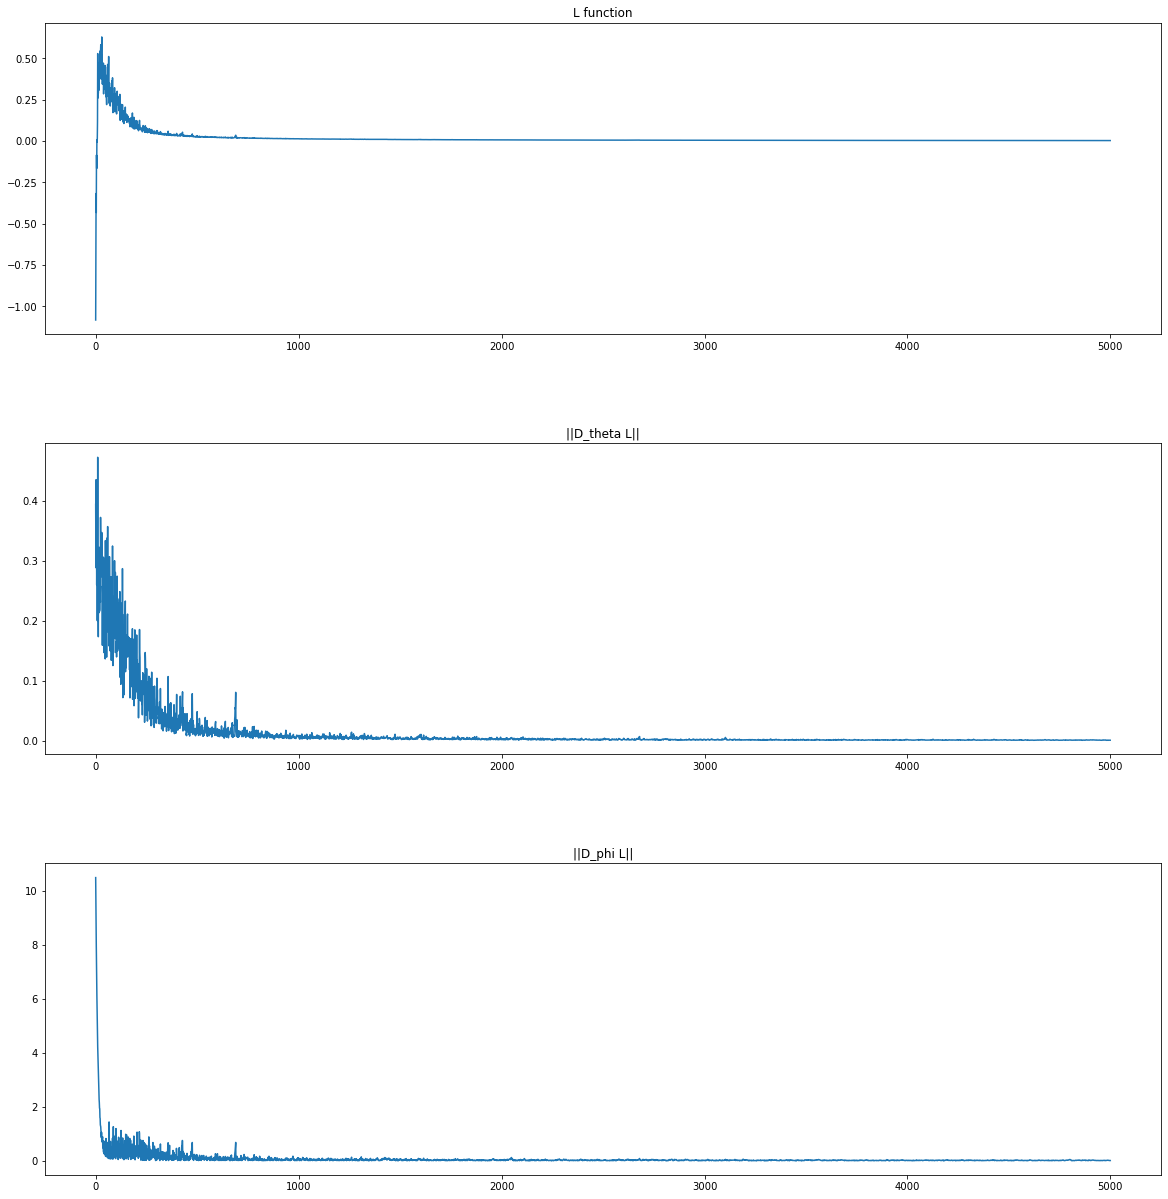

In [6]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.subplots_adjust(left=0.125,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.35)
plt.subplot(3, 1, 1)
plt.title("L function")
plt.plot(L_val)
plt.subplot(3, 1, 2)
plt.title("||D_theta L||")
plt.plot(np.linalg.norm(d_theta_val, axis=1, ord=2))
plt.subplot(3, 1, 3)
plt.title("||D_phi L||")
plt.plot(np.linalg.norm(d_phi_val, axis=1, ord=2))
plt.show()